In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
help(pd.read_csv)

In [5]:
df = pd.read_csv("titanic.csv") 

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Starting from reading this dataset, to answering questions about this data in a few lines of code:

**What is the age distribution of the Titanic passengers?**

# 2. The pandas data structures: `DataFrame` and `Series`

A `DataFrame` is a **tablular data structure** (multi-dimensional object to hold labeled data) comprised of rows and columns, akin to a spreadsheet.

In [ ]:
df

## DataFrame

The `DataFrame` is a kind of container object in a similar way as a `dictionary`. 

![dataframe](https://pandas.pydata.org/docs/_images/01_table_dataframe1.svg)

### Attributes of the DataFrame

Like dictionaries have `keys` and `values`, the contents of a DataFrame can be accessed using a set of attributes. The primary attributes for `DataFrames` are as follows:

In [ ]:
df.index # row labels

Note that `index` in Pandas DataFrames refers to **rows**. The row labels above are continuous, 0-891, and thus summarized. That is different from the column labels as you'll see below.

In [ ]:
df.columns # column labels

The `values` attribute returns an array (a `numpy` version of lists) or arrays that contains the whole dataset.

In [ ]:
df.values

The `shape` attribute is very useful for getting a sense of the size of the dataset. The format is `(n_rows, n_columns)`.

In [ ]:
df.shape

DataFrames can contain all kinds of different object types. Standard Python objects like `int` or `str` are put into object types conducive for DataFrames. To check the data types of the different columns:

In [ ]:
df.dtypes

An overview of that information can be given with the `info()` method:

In [ ]:
df.info()

### Building DataFrames from Scratch.

#### With a list

Apart from importing your data from an external source (text file, excel, database, ..), one of the most common ways of creating a dataframe is from a dictionary of arrays or lists.

Note that with this method, each list represents a single observation or, in this case, a country. You could use other ordered objects as well, such as `tuples`: i.e. tuple of lists, list of tuples, tuple of tuples, list of lists.

In [ ]:
data = [
    ['Belgium', 11.3, 30510, 'Brussels'],
    ['France', 64.3, 671308, 'Paris'],
    ['Germany', 81.3, 357050, 'Berlin'],
    ['Netherlands', 16.9, 41526, 'Amsterdam'],
    ['United Kingdom', 64.9, 244820, 'London']
]

headers = ['country', 'population', 'area', 'capital'] # column headers

df_countries = pd.DataFrame(data, columns=headers) # what happens if we don't say `columns=headers`?
df_countries

#### With a dictionary

Rather than feeding a list of rows, we can provide a dictionary of columns. In this case, the keys of the dictionary are the column labels and the values are some kind of ordered iterable (e.g. `list`, `tuple`, `pandas.Series`). Note that the items for each iterable should be in the order of the other iterables. For example, $64.3$ in "population" should correspond with "France" in 'country'.

In [ ]:
data = {
    'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
    'population': [11.3, 64.3, 81.3, 16.9, 64.9],
    'area': [30510, 671308, 357050, 41526, 244820],
    'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']
}
df_countries = pd.DataFrame(data)
df_countries

The vectorized methods have changed all of the contained data simultaneously rather than item-by-item. This is the power of Pandas.

### One-dimensional data: `Series` (a column of a DataFrame)

A Series is a basic holder for **one-dimensional labeled data**, similar to a `list` or `tuple`, but possessing special methods and optimizations for data analysis. A `DataFrame` consists of `Series` objects "glued" together. For instance, if we select the "Age" column below we'll see that the column *is* a `Series`.

![series](https://pandas.pydata.org/docs/_images/01_table_series.svg)

In [ ]:
age = df['Age']
print(type(df['Age']))

In [ ]:
age

The `Series` has a lot of useful methods. Here are some examples:

In [ ]:
print('mean', age.mean())
print('max', age.max())
print('min', age.min())
print('mean', age.mean())
print('sum', age.sum())
print('quantile', age.quantile(1))

### Attributes of a Series: `index` and `values`

The Series has also an `index` and `values` attribute, but no `columns`

In [ ]:
age.index

You can access the underlying numpy array representation with the `.values` attribute:

In [ ]:
age.values[:10]

We can access series values via the index, just like for NumPy arrays:

In [ ]:
age[0]

Unlike the NumPy array, though, this index can be something other than integers:

In [ ]:
df = df.set_index('Name')
df

In [ ]:
age = df['Age']
age

In [ ]:
age['Dooley, Mr. Patrick']

but with the power of numpy arrays. Many things you can do with numpy arrays, can also be applied on DataFrames / Series.

Eg element-wise operations:

In [ ]:
age * 1000

A range of methods:

In [ ]:
age.mean()

Fancy indexing, like indexing with a list or boolean indexing:

In [ ]:
age[age > 70]

But also a lot of pandas specific methods, e.g.

In [5]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>What is the maximum Fare that was paid? And the median?</li>
</ul>
</div>

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate the average survival ratio for all passengers (note: the 'Survived' column indicates whether someone survived (1) or not (0)).</li>
</ul>
</div>

0.3838383838383838

# 5. Selecting and filtering data

For a DataFrame, basic indexing selects the columns.

Selecting a single column:

In [ ]:
df['Age']

or multiple columns:

In [ ]:
df[['Age', 'Fare']]

But, slicing accesses the rows:

In [ ]:
df[10:15]

### Systematic indexing with `loc` and `iloc`

When using `[]` like above, you can only select from one axis at once (rows or columns, not both). For more advanced indexing, you have some extra attributes:
    
* `loc`: selection by label
* `iloc`: selection by position

In [ ]:
df = df.set_index('Name')

Note that we've now changed the index to the `Name` column:

In [ ]:
df.head()

In [ ]:
df.loc['Bonnell, Miss. Elizabeth', 'Fare']

In [ ]:
df.loc['Bonnell, Miss. Elizabeth':'Andersson, Mr. Anders Johan', :]

Selecting by position with `iloc` works similar as indexing numpy arrays:

In [ ]:
df.iloc[0:2,1:3]

The different indexing methods can also be used to assign data:

In [ ]:
df.loc['Braund, Mr. Owen Harris', 'Survived'] = 100

In [ ]:
df

### Boolean indexing (filtering)

Often, you want to select rows based on a certain condition. This can be done with 'boolean indexing' (like a where clause in SQL) and comparable to numpy. 

The indexer (or boolean mask) should be 1-dimensional and the same length as the thing being indexed.

In [ ]:
df['Fare'] > 50

In [ ]:
df[df['Fare'] > 50]

# Frequency Distribution

In [26]:
with open('alice.txt','r') as f:
    alice = f.readlines()
all_freq = {} 
  
for line in alice[:100]:
    for word in line.split():
        if word in all_freq: 
            all_freq[word] += 1
        else: 
            all_freq[word] = 1
        
print(all_freq)

{'***This': 2, 'is': 10, 'the': 21, 'Project': 9, 'Gutenberg': 8, 'Etext': 3, 'of': 19, 'Alice': 2, 'in': 7, 'Wonderland***': 1, '*This': 1, '30th': 1, 'edition': 2, 'should': 3, 'be': 5, 'labeled': 1, 'alice30.txt': 2, 'or': 5, 'alice30.zip.': 1, 'Edition': 1, 'Is': 1, 'Being': 1, 'Officially': 1, 'Released': 1, 'On': 1, 'March': 1, '8,': 1, '1994***': 1, '**In': 1, 'Celebration': 1, 'Of': 1, 'The': 5, '23rd': 1, 'Anniversary': 1, 'Gutenberg***': 1, 'Please': 2, 'take': 2, 'a': 6, 'look': 2, 'at': 5, 'important': 1, 'information': 3, 'this': 6, 'header.': 1, 'We': 7, 'encourage': 1, 'you': 4, 'to': 19, 'keep': 1, 'file': 4, 'on': 3, 'your': 3, 'own': 1, 'disk,': 1, 'keeping': 1, 'an': 3, 'electronic': 1, 'path': 1, 'open': 1, 'for': 6, 'next': 2, 'readers.': 2, 'Do': 1, 'not': 1, 'remove': 1, 'this.': 1, '**Welcome': 1, 'To': 2, 'World': 1, 'Free': 1, 'Plain': 1, 'Vanilla': 1, 'Electronic': 1, 'Texts**': 1, '**Etexts': 1, 'Readable': 1, 'By': 3, 'Both': 1, 'Humans': 1, 'and': 9, 'Comp

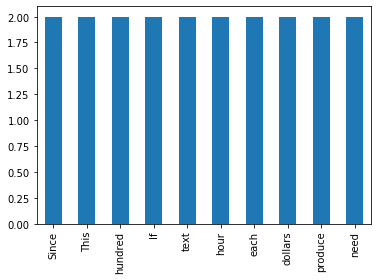

In [28]:
freq_series = pd.Series(all_freq)
freq_series.sort_values(ascending=False)[50:60].plot(kind='bar')

# Exercises

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Based on the titanic data set, select all rows for male passengers and calculate the mean age of those passengers. Do the same for the female passengers</li>
</ul>
</div>

In [2]:
df = pd.read_csv("titanic.csv")

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Based on the titanic data set, how many passengers older than 70 were on the Titanic?</li>
</ul>
</div>